# Logistic Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sigmoid function

In [2]:
def sigmoid(x):
    v=1/(1+np.exp(-x))
    print(v)
    return v

In [3]:
x = np.arange(-10,11)
y = sigmoid(x)

[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01
 9.99954602e-01]


In [4]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [5]:
y

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01,
       9.99954602e-01])

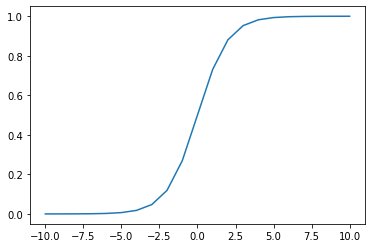

In [6]:
plt.plot(x,y)
plt.show()

In [7]:
df = pd.read_csv("insurance.csv")

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


## Check data balance

In [9]:
df["insuranceclaim"].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

## Train test split

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=1)

## Baseline model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log = LogisticRegression()

In [17]:
log.fit(X_train,y_train)

C:\Users\itvedant-le2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
log.score(X_test,y_test)

0.8134328358208955

In [19]:
log.coef_

array([[-1.92660472e-02, -1.13614544e-01,  1.13194147e-01,
        -1.34904977e+00,  1.05537452e+00, -1.28048656e-01,
         7.99303100e-05]])

In [20]:
y_pred = log.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

## Evaluation metrics

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [23]:
print(tp, fn)
print(fp, tn)

214 31
44 113


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Accuracy means the fraction which is predicted correctly
# formula for the same is
# Accuracy = TP + TN / TP + TN + FP + FN
accuracy_score(y_test,y_pred)

0.8134328358208955

In [26]:
# Precision is the fraction of predicted positive event 
# that are actually positive
# formula is
# Precision = TP / TP + FP
precision_score(y_test,y_pred)

0.8294573643410853

In [27]:
# Recall is sensitivity, it is the fraction of positive
# events that are predicted correctly
# formula is
# Recall (Sensitivity) = TP / TP + FN
recall_score(y_test,y_pred)

0.8734693877551021

In [28]:
# F1 score is the harmonic mean of recall and precision
# with a higher score as a better model.
# formula is
# F1 = 2 * (precision*recall) / precision + recall
f1_score(y_test,y_pred)

0.8508946322067595

In [29]:
# ROC curves are VERY help with understanding the balance 
# between true-positive rate and false positive rates.
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [30]:
# fpr = the false positive rate (FP / (FP + TN)) for each threshold
fpr

array([0.        , 0.28025478, 1.        ])

In [31]:
# tpr = the true positive rate (TP / (TP + FN)) for each threshold
tpr

array([0.        , 0.87346939, 1.        ])

In [32]:
# thresholds = all unique prediction probabilities in descending order
threshold

array([2, 1, 0], dtype=int64)

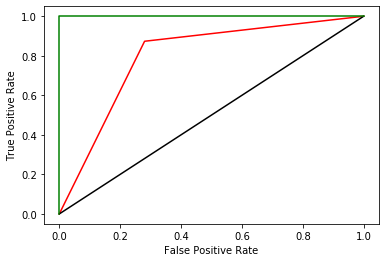

In [33]:
# plotting the ROC curve
plt.plot(fpr, tpr, 'r-')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [34]:
# now we shall analize the performance using AUC
# (Area under curve metrics)
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(auc)

0.7966073053425192


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       157
           1       0.83      0.87      0.85       245

    accuracy                           0.81       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.81      0.81       402



## Reducing weight of the column

In [36]:
X["charges"] = np.sqrt(X["charges"])

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [38]:
log2 = LogisticRegression()

In [39]:
log2.fit(X_train,y_train)

C:\Users\itvedant-le2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
log2.score(X_test,y_test)

0.8781094527363185

In [41]:
y_pred = log2.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       157
           1       0.90      0.90      0.90       245

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



In [43]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [44]:
print(tp, fn)
print(fp, tn)

221 24
25 132


In [45]:
log2.coef_

array([[ 1.30105797e-02,  9.57380137e-03,  1.95634394e-01,
        -1.28268886e+00,  3.24987497e+00, -1.60642405e-02,
         1.67310238e-03]])

In [46]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.8714025737683609
